<a href="https://colab.research.google.com/github/EllaRashty/Machine-Learning-/blob/main/ML_2020_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Details
Name: Ella Rashty  
ID : 208285767  
Link: https://www.kaggle.com/ellarashty  

# Competiton
In this competition, used similar datasets that include passenger information: name, age, gender, socio-economic class, etc.
One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

My goal from the assignment is introducing with the platform and the learned functions.  
I will search relevant graphs to present the DATA clearly, and addition I will learn another function to enrich the assignment and my knowledge.  
I will try to understand the DATA deeply and try to present my line of though. 

# Data  
import Libraries:

In [ ]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import svm 



# define plt settings
# sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["legend.title_fontsize"] = 20

Load the Data


In [ ]:
data_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
data_df.shape

(891, 12)

# Data Vizualization  


checking which keys have in the DATA

In [ ]:
print(data_df.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


check for each key which values it have

In [ ]:
data_df.head()
display(data_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Attempted drawing of one graph

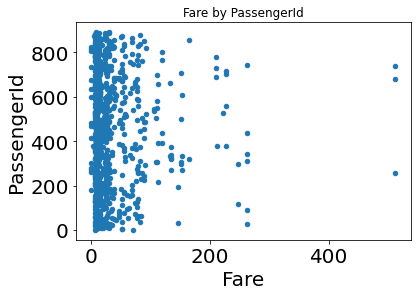

In [ ]:
# plot the connection between 2 features
def plot_connection_between_2_features(df, feature_1_name, feature_2_name):
    df.plot.scatter(x=feature_1_name, y=feature_2_name, title=f'{feature_1_name} by {feature_2_name}')

plot_connection_between_2_features(data_df, 'Fare', 'PassengerId')

Checking if there are empty values in the fetures


In [ ]:
data_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

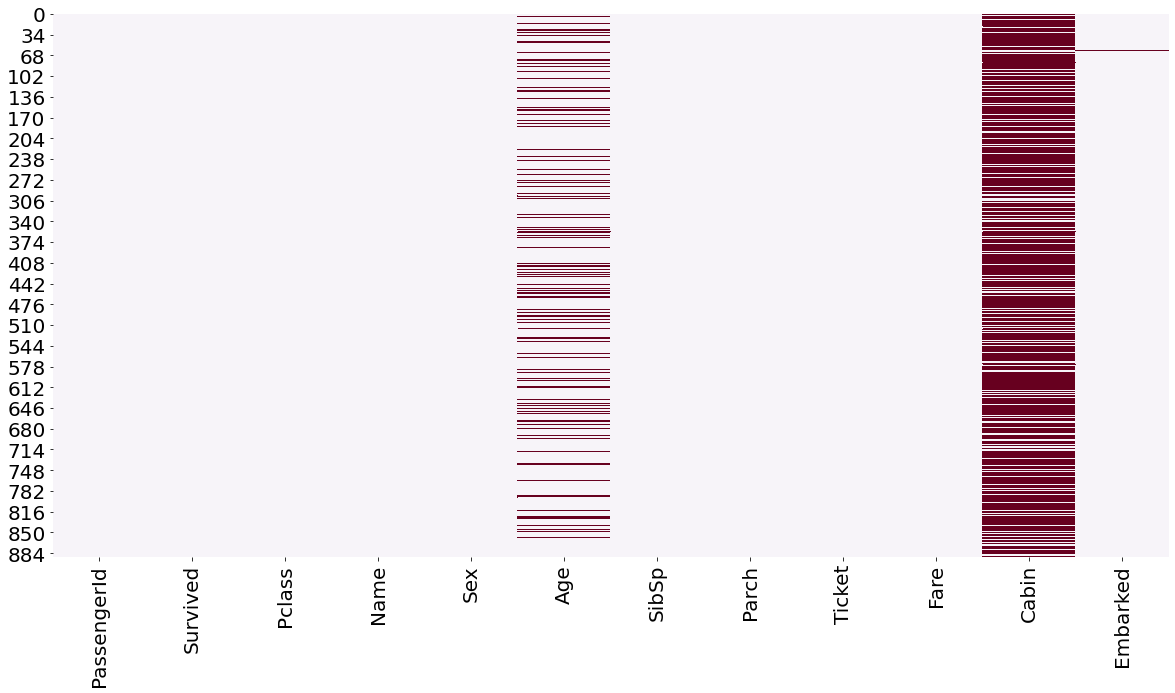

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_df.isnull(),cbar=False,cmap='PuRd')
plt.ioff()

In [ ]:
data_df['Title']=0
for i in data_df:
    data_df['Title']=data_df.Name.str.extract('([A-Za-z]+)\.') 

for i in test_df:
    test_df['Title']=data_df.Name.str.extract('([A-Za-z]+)\.')     

pd.crosstab(data_df.Title,data_df.Sex).T

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data_df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test_df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


pd.crosstab(data_df.Title,data_df.Sex).T

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [ ]:
data_df.groupby('Title')['Age'].mean() # checks the average age by Initials

Title
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Assigning the NaN Values with the Ceil values of the mean ages:

In [ ]:
data_df.loc[(data_df.Age.isnull())&(data_df.Title=='Mr'),'Age']=33
data_df.loc[(data_df.Age.isnull())&(data_df.Title=='Mrs'),'Age']=36
data_df.loc[(data_df.Age.isnull())&(data_df.Title=='Master'),'Age']=5
data_df.loc[(data_df.Age.isnull())&(data_df.Title=='Miss'),'Age']=22
data_df.loc[(data_df.Age.isnull())&(data_df.Title=='Other'),'Age']=46

data_df.Age.isnull().any()

False

Assigning For the file test:

In [ ]:
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Mr'),'Age']=33
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Mrs'),'Age']=36
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Master'),'Age']=5
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Miss'),'Age']=22
test_df.loc[(test_df.Age.isnull())&(test_df.Title=='Other'),'Age']=46

test_df.Age.isnull().any()

False

In [ ]:
data_df['Embarked'].fillna('S',inplace=True)
data_df.Embarked.isnull().any()

# for the test file
test_df['Embarked'].fillna('S',inplace=True)

In [ ]:
data_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Title          False
dtype: bool

show absolute correlation between features in a heatmap

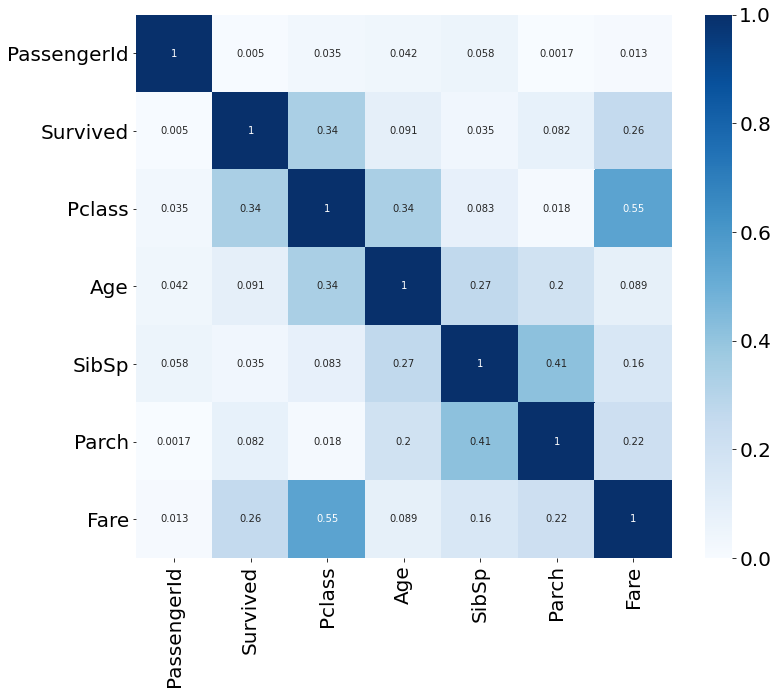

In [ ]:
plt.figure(figsize=(12,10))
cor = np.abs(data_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.show()

![image](https://user-images.githubusercontent.com/48799296/99184373-0089e680-274b-11eb-8c7c-1b747a1315a4.png)


we can see there is not the correct method of find he correlation between features and Survived.

In [ ]:
cols = data_df.columns
print(list(cols))


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title']


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


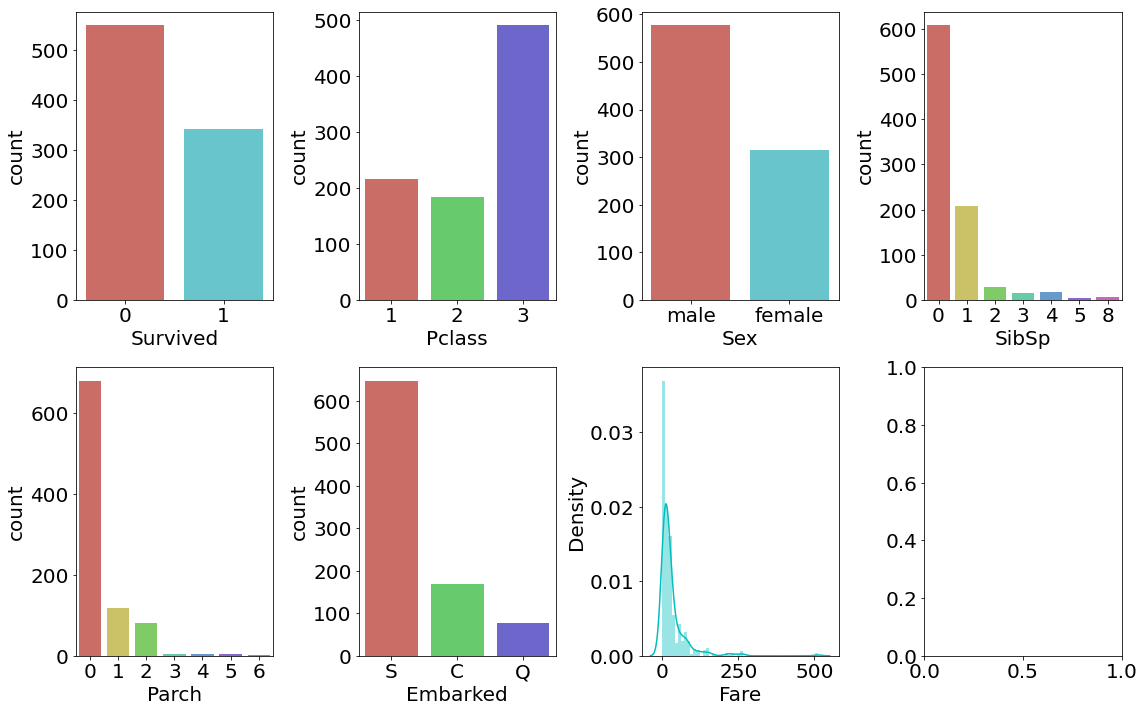

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Survived',data=data_df,ax=ax[0][0],palette='hls')
sns.countplot(x='Pclass',data=data_df,ax=ax[0][1],palette='hls')
sns.countplot(x='Sex',data=data_df,ax=ax[0][2],palette='hls')
sns.countplot(x='SibSp',data=data_df,ax=ax[0][3],palette='hls')
sns.countplot(x='Parch',data=data_df,ax=ax[1][0],palette='hls')
sns.countplot(x='Embarked',data=data_df,ax=ax[1][1],palette='hls')
sns.distplot(a=data_df['Fare'],kde=True,ax=ax[1][2],color='c')
plt.tight_layout()

From diagram:  
• More people died then people survived.  
• More people traveled in 3rd class.  
• There were more male than female on titanic.  
• Most of the people were travelling alone (Parch).  
• More people embarked from S.  
• The fare for most people was less than 100.  


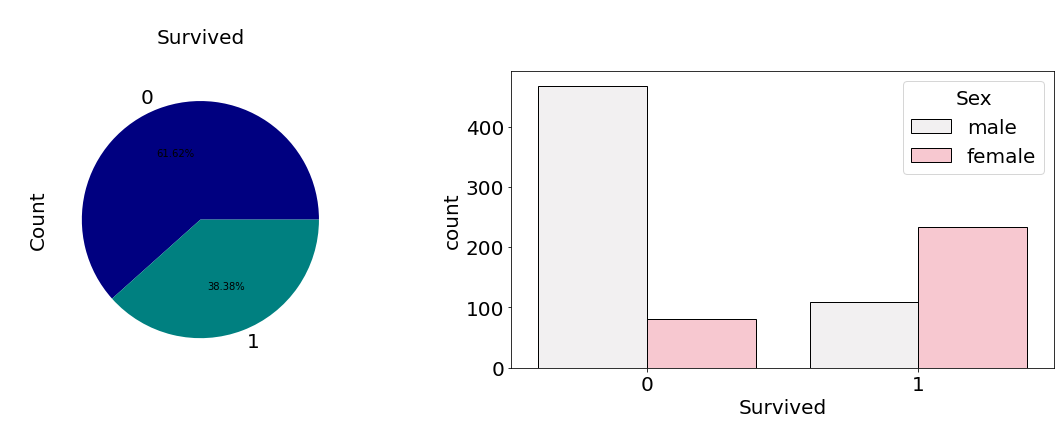

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data_df['Survived'].value_counts().plot.pie(ax=ax[0],autopct='%0.2f%%',colors=['navy','teal'])
ax[0].set_title('\nSurvived\n',fontsize=20)
ax[0].set_ylabel('\nCount',fontsize=20)
sns.countplot(x='Survived',hue='Sex',data=data_df,ax=ax[1],color='Pink',edgecolor='Black')
plt.tight_layout()
plt.ioff()

• More female Survived cmpared to male.  

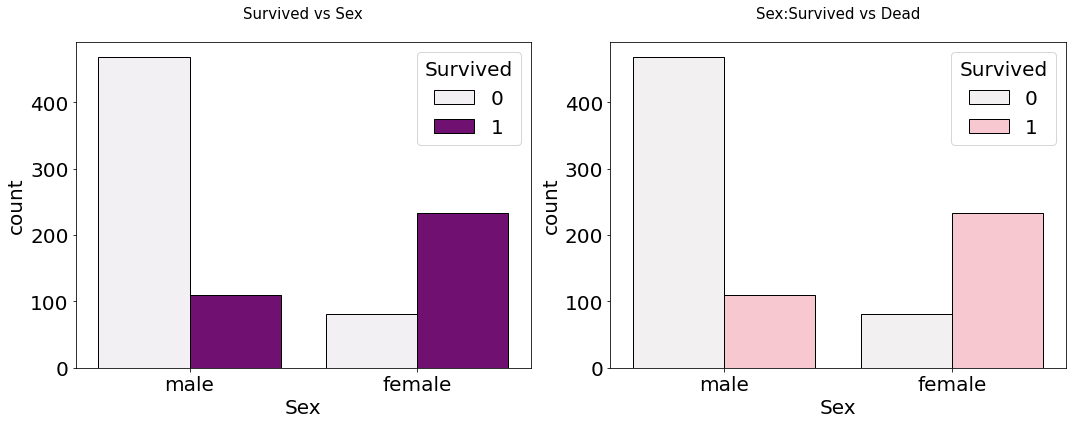

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x='Sex',hue='Survived',data=data_df,ax=ax[0],color='Purple',edgecolor='Black')
ax[0].set_title('Survived vs Sex\n',fontsize=15)
sns.countplot(x='Sex',hue='Survived',data=data_df,ax=ax[1],color='Pink',edgecolor='Black')
ax[1].set_title('Sex:Survived vs Dead\n',fontsize=15)
plt.tight_layout()
plt.show()

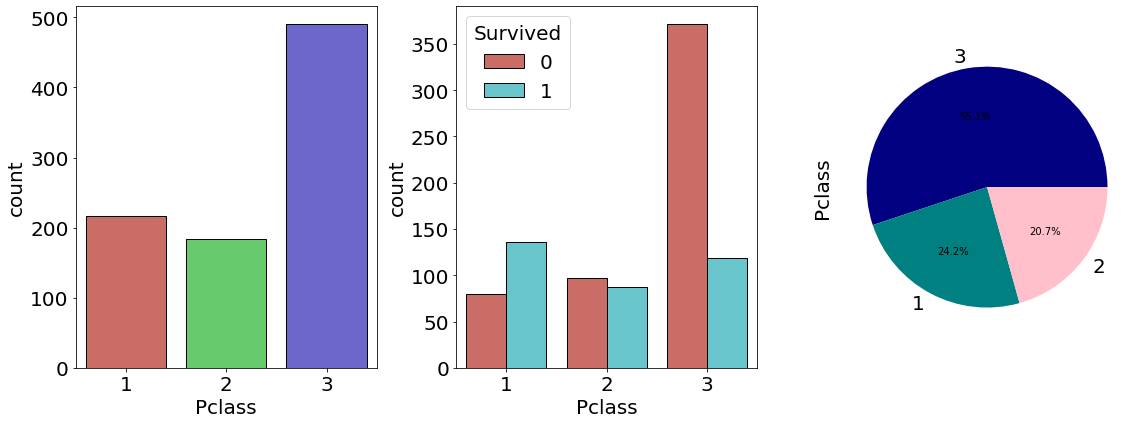

In [ ]:
f,ax=plt.subplots(1,3,figsize=(16,6))
sns.countplot(x='Pclass',data = data_df,ax=ax[0],palette='hls',edgecolor='Black')
sns.countplot(x='Pclass',hue='Survived',data = data_df,color='Green',edgecolor='Black',ax=ax[1],palette='hls')
data_df['Pclass'].value_counts().plot.pie(autopct="%1.1f%%",ax=ax[2],colors=['navy','teal','pink'])
plt.tight_layout()
plt.ioff()

• More people travelled in third class but the percent of survived is low


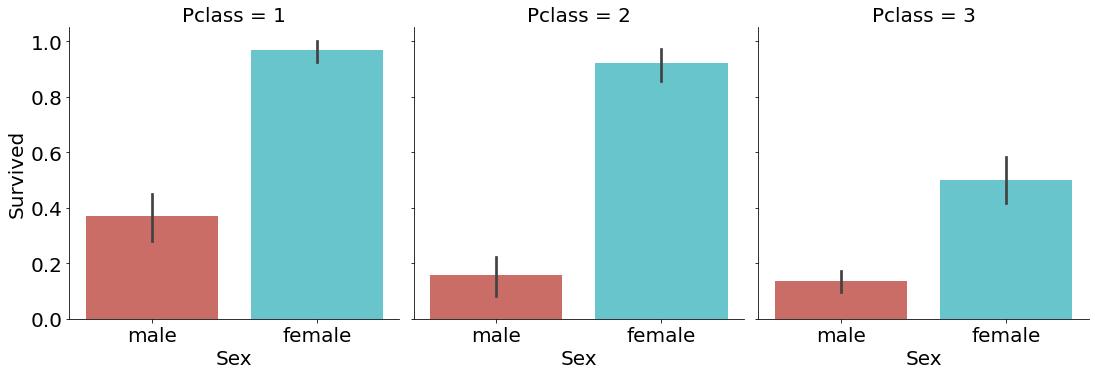

In [ ]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=data_df,col='Pclass',palette='hls')
pass

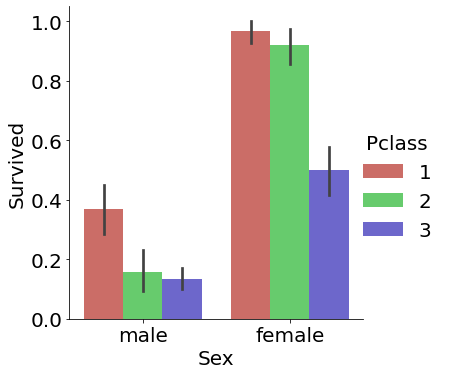

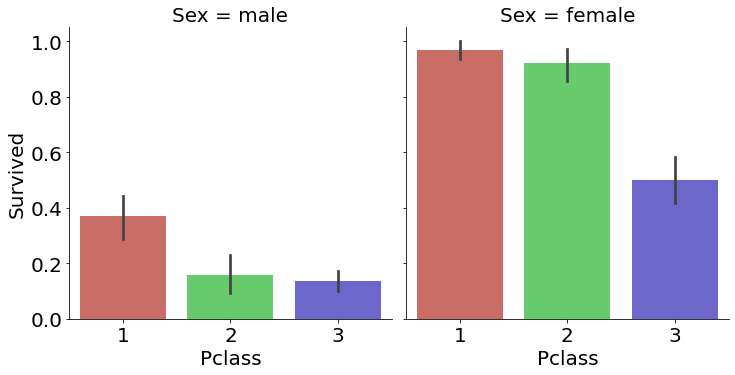

In [ ]:
sns.catplot(x='Sex',y='Survived',kind='bar',data=data_df,hue='Pclass',palette='hls')
sns.catplot(x='Pclass',y='Survived',kind='bar',data=data_df,col='Sex',palette='hls')
pass

• Female in first and second class have almost same chance of survival

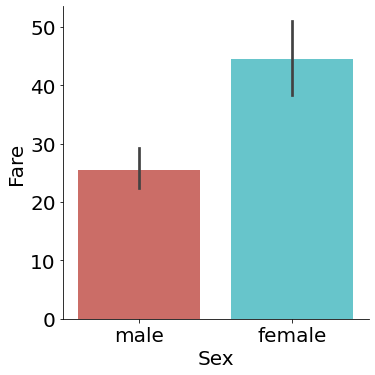

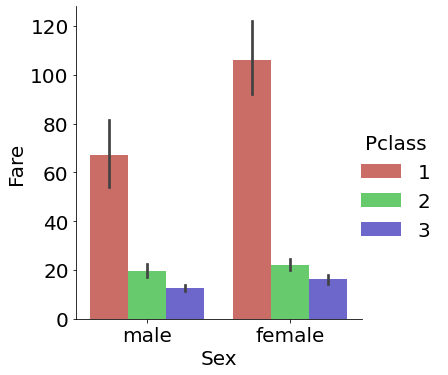

In [ ]:
sns.catplot(x='Sex',y='Fare',data=data_df,kind='bar',palette='hls')
sns.catplot(x='Sex',y='Fare',data=data_df,kind='bar',hue='Pclass',palette='hls')
plt.show()

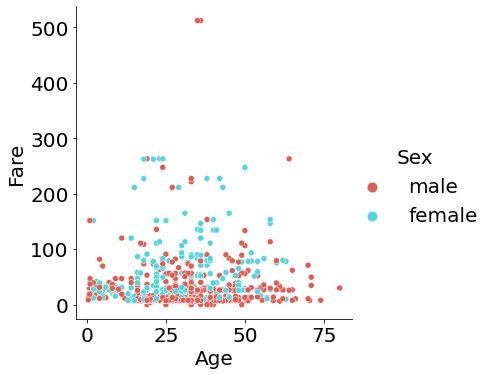

In [ ]:
# plot the connection between 2 features
def plot_connection_between_3_features(df, feature_1_name, feature_2_name,feature_3_name):
    sns.relplot(x=feature_1_name,y=feature_2_name,data=df,hue=feature_3_name,palette='hls')

plot_connection_between_3_features(data_df, 'Age', 'Fare','Sex')

Doesn't mean nothing  

Therefore creating related features 

**Fare:**

In [ ]:
data_df['Fare_Range']=pd.qcut(data_df['Fare'],4) # split the range values to 4 
data_df.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Dividing the values to the 4 groups

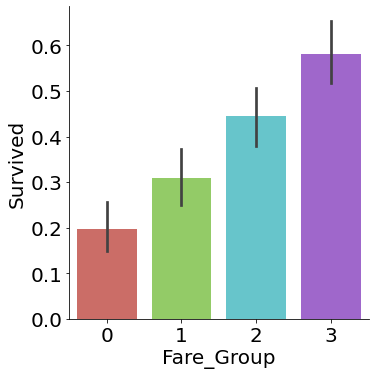

In [ ]:
data_df['Fare_Group']=0
data_df.loc[data_df['Fare']<=7.91,'Fare_Group']=0
data_df.loc[(data_df['Fare']>7.91)&(data_df['Fare']<=14.454),'Fare_Group']=1
data_df.loc[(data_df['Fare']>14.454)&(data_df['Fare']<=31),'Fare_Group']=2
data_df.loc[(data_df['Fare']>31)&(data_df['Fare']<=513),'Fare_Group']=3
sns.catplot(x='Fare_Group',y='Survived',data=data_df,kind='bar',palette='hls')
pass

• As the fare increased the the survival percentage increases.  


Aplay for the test file:

In [ ]:
test_df['Fare_Group']=0
test_df.loc[data_df['Fare']<=7.91,'Fare_Group']=0
test_df.loc[(data_df['Fare']>7.91)&(test_df['Fare']<=14.454),'Fare_Group']=1
test_df.loc[(data_df['Fare']>14.454)&(test_df['Fare']<=31),'Fare_Group']=2
test_df.loc[(data_df['Fare']>31)&(test_df['Fare']<=513),'Fare_Group']=3

**Age:**

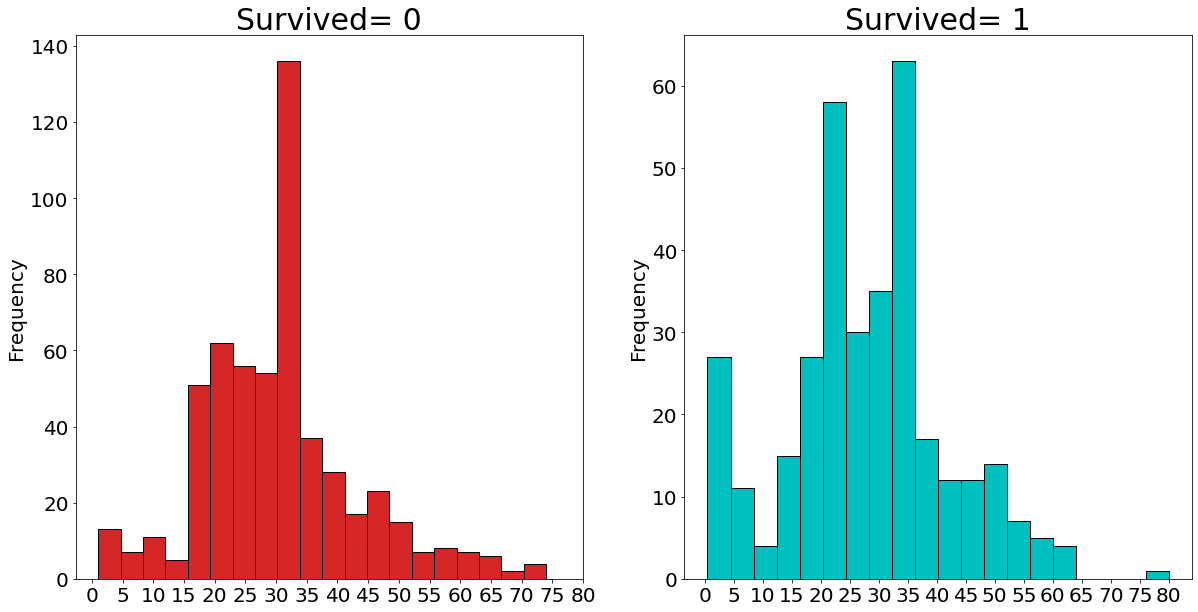

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data_df[data_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='tab:red')
ax[0].set_title('Survived= 0',fontsize=30)
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data_df[data_df['Survived']==1].Age.plot.hist(ax=ax[1],color='c',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1',fontsize=30)
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

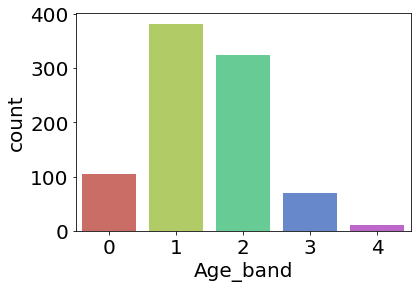

In [ ]:
data_df['Age_band']=0
data_df.loc[data_df['Age']<=16,'Age_band']=0
data_df.loc[(data_df['Age']>16)&(data_df['Age']<=32),'Age_band']=1
data_df.loc[(data_df['Age']>32)&(data_df['Age']<=48),'Age_band']=2
data_df.loc[(data_df['Age']>48)&(data_df['Age']<=64),'Age_band']=3
data_df.loc[data_df['Age']>64,'Age_band']=4
sns.countplot(x='Age_band',data=data_df,palette='hls')
pass

Aplay the same for the test file:

In [ ]:
test_df['Age_band']=0
test_df.loc[test_df['Age']<=16,'Age_band']=0
test_df.loc[(test_df['Age']>16)&(test_df['Age']<=32),'Age_band']=1
test_df.loc[(test_df['Age']>32)&(test_df['Age']<=48),'Age_band']=2
test_df.loc[(test_df['Age']>48)&(test_df['Age']<=64),'Age_band']=3
test_df.loc[test_df['Age']>64,'Age_band']=4
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Group,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,3,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Miss,1,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mrs,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mr,1,1


• Most of the passengers between the ages 16-48.

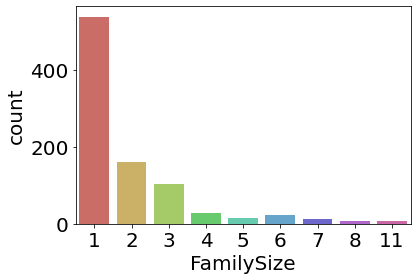

In [ ]:
data_df["FamilySize"] = data_df["SibSp"] + data_df["Parch"]+1
sns.countplot(x='FamilySize',data=data_df,palette='hls')
pass

# for the test file
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"]+1

• Most of the passengers travelled alone.

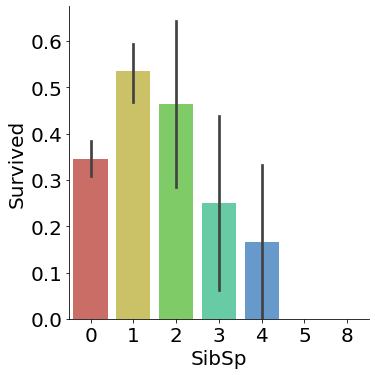

In [ ]:
sns.catplot(x='SibSp',y='Survived',data=data_df,kind='bar',palette='hls')
pass

• If people had some one with them it increase there chance of survival- when SibSp was 1 & 2. But when SibSp goes beyond 3 then the survival percentage decreases.  

In [ ]:
pd.crosstab(data_df.Parch,data_df.Pclass)


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


• Larger Families travelled in 3rd Class

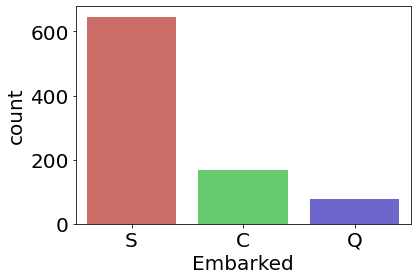

In [ ]:
sns.countplot(x='Embarked',data=data_df,palette='hls')
pass

• More people boarded from S

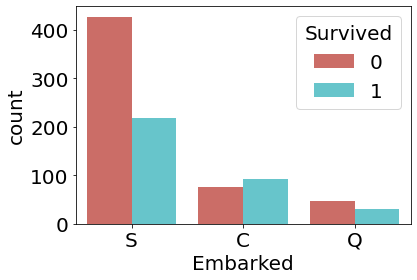

In [ ]:
sns.countplot(x='Embarked',data=data_df,hue='Survived',palette='hls')
pass

• Most of the surviving people boarded from Southampton.

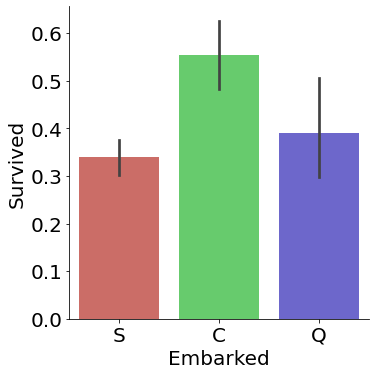

In [ ]:
sns.catplot(x="Embarked", y="Survived",kind='bar',data=data_df,palette='hls');
pass

• The highest percent of Surviving is from Cherbourg

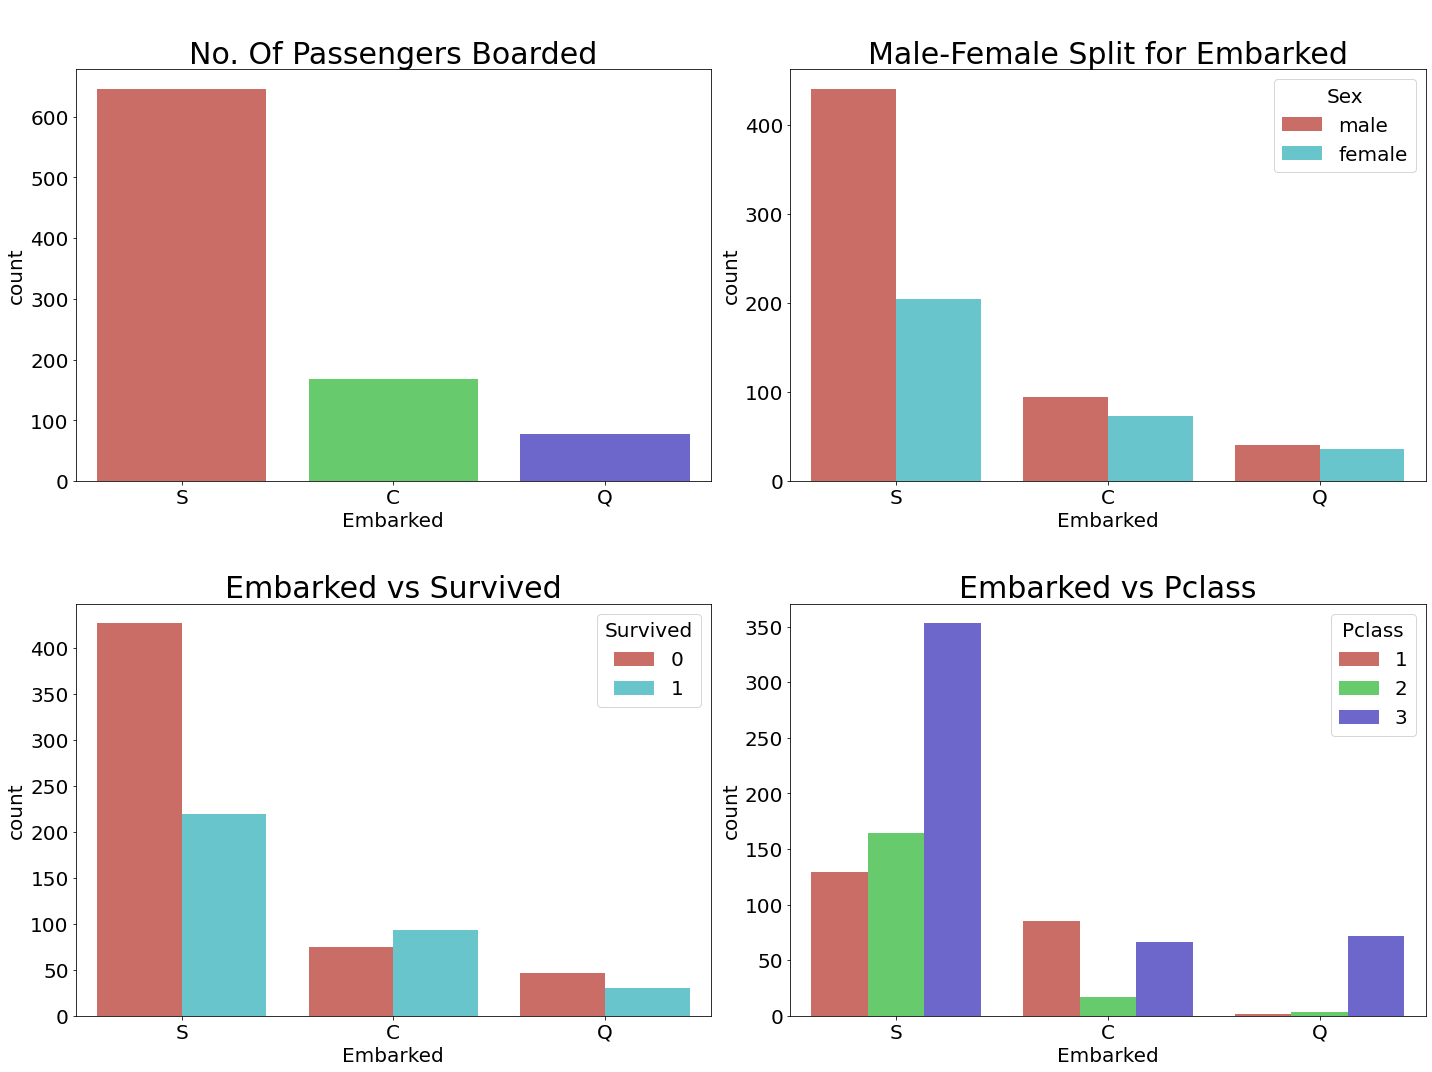

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data_df,ax=ax[0,0],palette='hls')
ax[0,0].set_title('\nNo. Of Passengers Boarded',fontsize=30)
sns.countplot(x='Embarked',hue='Sex',data=data_df,ax=ax[0,1],palette='hls')
ax[0,1].set_title('\nMale-Female Split for Embarked',fontsize=30)
sns.countplot(x='Embarked',hue='Survived',data=data_df,ax=ax[1,0],palette='hls')
ax[1,0].set_title('\nEmbarked vs Survived',fontsize=30)
sns.countplot(x='Embarked',hue='Pclass',data=data_df,ax=ax[1,1],palette='hls')
ax[1,1].set_title('\nEmbarked vs Pclass',fontsize=30)
plt.tight_layout()
plt.show()

• Most of passengers boarded from Southampton.  
• In all the ports more males boarded than females.  
• In port Cherbourg number of survived was more than the number of died.  
• Most of passengers boarded from Queenstown were in 3nd class.  
• Most of passengers boarded from Cherbourg were in 1nd class.  


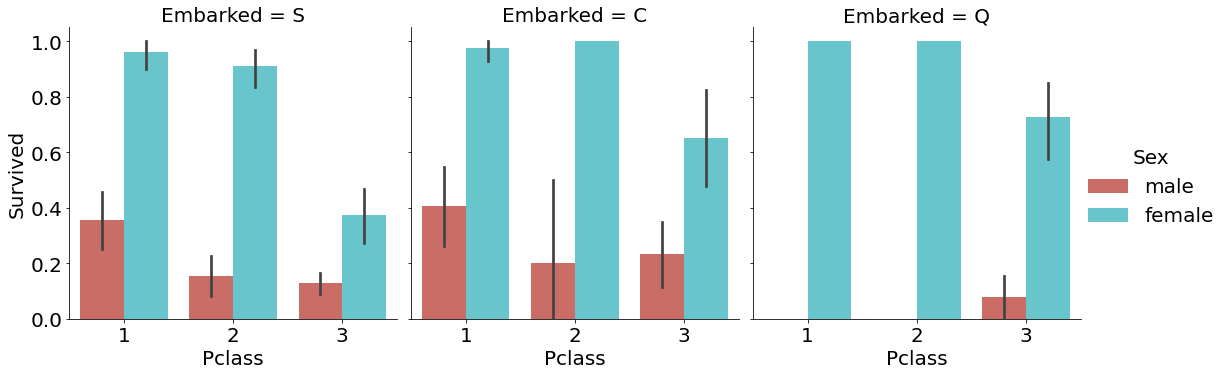

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data_df,kind='bar',palette='hls')
pass

• Female in 1st and 2nd class has close to 100 % Survival rate.  
• Port Queenstown have the lowest Survival rate for men.  


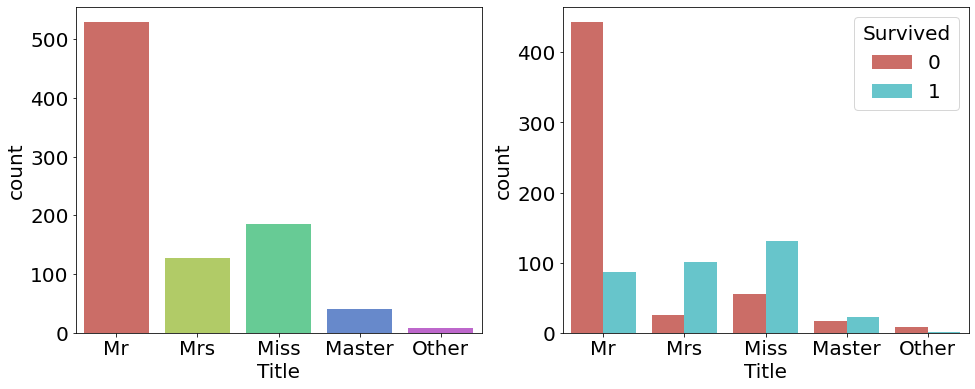

In [ ]:
f,ax=plt.subplots(1,2 ,figsize=(16,6))
sns.countplot(x='Title',data=data_df,ax=ax[0],palette='hls')
sns.countplot(x='Title',data=data_df,palette='hls',hue='Survived',ax=ax[1])
plt.show()

Converting String to Numerical Values

In [ ]:
data_df['Sex'] = data_df['Sex'].astype(str)
data_df['Embarked'] = data_df['Embarked'].astype(str)
data_df['Sex'].replace(['male','female'],[0,1],inplace=True)
data_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data_df['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Range,Fare_Group,Age_band,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,"(-0.001, 7.91]",0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,"(31.0, 512.329]",3,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(7.91, 14.454]",1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,"(31.0, 512.329]",3,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,"(7.91, 14.454]",1,2,1


Aplay for the test file:

In [ ]:
test_df['Sex'] = test_df['Sex'].astype(str)
test_df['Embarked'] = test_df['Embarked'].astype(str)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_df['Title'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

Dropping Unwanted Columns  


In [ ]:
copy_df=data_df.copy()
copy_df.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId','SibSp','Parch','Fare_Range'],axis=1,inplace=True)
# for the trest file
copy_test=test_df.copy()
copy_test.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId','SibSp','Parch'],axis=1,inplace=True)

In [ ]:
copy_df.head()

,Survived,Pclass,Sex,Embarked,Title,Fare_Group,Age_band,FamilySize
0,0,3,0,0,0,0,1,2
1,1,1,1,1,1,3,2,2
2,1,3,1,0,2,1,1,1
3,1,1,1,0,1,3,2,2
4,0,3,0,0,0,1,2,1


In [ ]:
copy_test.head()

,Pclass,Sex,Embarked,Title,Fare_Group,Age_band,FamilySize
0,3,0,2,0,0,2,1
1,3,1,0,1,3,2,2
2,2,0,2,2,1,3,1
3,3,0,0,1,3,1,1
4,3,1,0,0,1,1,3


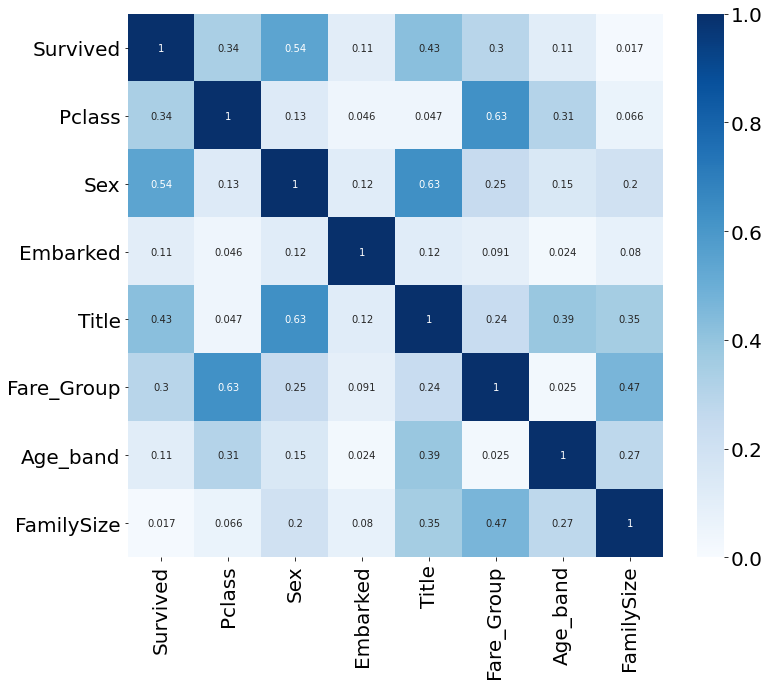

In [ ]:
plt.figure(figsize=(12,10))
cor = np.abs(copy_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1)
plt.show()

# Model    
Creating Matrix of Features¶


In [ ]:
t = copy_df['Survived']
X = copy_df.drop('Survived',axis=1)
print('X:')
display(X)
print('\n t:')
display(t)



X:


,Pclass,Sex,Embarked,Title,Fare_Group,Age_band,FamilySize
0,3,0,0,0,0,1,2
1,1,1,1,1,3,2,2
2,3,1,0,2,1,1,1
3,1,1,0,1,3,2,2
4,3,0,0,0,1,2,1
...,...,...,...,...,...,...,...
886,2,0,0,4,1,1,1
887,1,1,0,2,2,1,1
888,3,1,0,2,2,1,4
889,1,0,1,0,2,1,1



 t:


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Test Train Split

In [ ]:
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.1, random_state=2)
print('X_train:')
print('Training Set:',len(X_train))
print('\nX_test:')
print('Test Set:',len(X_test))
print('\nt_train:')
print('Training labels:',len(t_train))
print('\nt_test:')
print('Test labels:',len(t_test))


X_train:
Training Set: 801

X_test:
Test Set: 90

t_train:
Training labels: 801

t_test:
Test labels: 90


♦ The score of the test is lower therefore the MSE of the test is higher compare to the train.    

The Model isn't good enough.  

**Temp for SGD:**

**Temp with StandardScaler (SGD with normal):**  

In [ ]:
linear_model.LogisticRegression()
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.LogisticRegression()).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)
print('first 5 probabilities of y_train_prob:')
print(y_train_prob[:5])
print('\nfirst 5 predictions of y_train:')
print(y_train[:5])
print('\nfirst 5 probabilities of y_test_prob:')
print(y_test_prob[:5])
print('\nfirst 5 predictions of y_test:')
print(y_test[:5])

first 5 probabilities of y_train_prob:
[[0.92298455 0.07701545]
 [0.88916795 0.11083205]
 [0.869308   0.130692  ]
 [0.95313549 0.04686451]
 [0.93529494 0.06470506]]

first 5 predictions of y_train:
[0 0 0 0 0]

first 5 probabilities of y_test_prob:
[[0.62504186 0.37495814]
 [0.88916795 0.11083205]
 [0.20396194 0.79603806]
 [0.80207633 0.19792367]
 [0.79825292 0.20174708]]

first 5 predictions of y_test:
[0 0 1 0 0]


Temp for only 2 features

In [ ]:
#SGD on Sex and Pclass
# SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor(alpha=0, learning_rate='constant')).fit(X_train[['Sex', 'Pclass']], t_train)
# y_train = SGD_reg.predict(X_train[['Sex', 'Pclass']])
# y_test = SGD_reg.predict(X_test[['Sex', 'Pclass']])
# print('SGD-Linear Regression for: Sex & Pcalss')
# print('\nAccuracy for train is:', SGD_reg.score(X_train[['Sex', 'Pclass']], t_train))
# print('Accuracy for test is', SGD_reg.score(X_test[['Sex', 'Pclass']], t_test))
# print('\nMSE on train', metrics.mean_squared_error(t_train, y_train))
# print('MSE on test', metrics.mean_squared_error(t_test, y_test))
# print('\nRMSE on train', metrics.mean_squared_error(t_train, y_train, squared=False))
# print('RMSE on test', metrics.mean_squared_error(t_test, y_test, squared=False))

To improve the correlation I avoided the feature with the lowest score in the correlation- which is "Embarked".

In [ ]:
# # Pclass	Sex	Embarked	Title	Fare_Group	Age_band	FamilySize
# #SGD on: Sex & Pcalss & Title & Fare_Group & Embarked
# SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor(alpha=0, learning_rate='constant')).fit(X_train[['Sex', 'Pclass','Title','Fare_Group','Age_band','FamilySize']], t_train)
# y_train = SGD_reg.predict(X_train[['Sex', 'Pclass','Title','Fare_Group','Age_band','FamilySize']])
# y_test = SGD_reg.predict(X_test[['Sex', 'Pclass','Title','Fare_Group','Age_band','FamilySize']])
# print('SGD-Linear Regression for:\n\t\t Sex & Pcalss & Title & Fare_Group & Age_band & FamilySize')
# print('\nAccuracy for train is:', SGD_reg.score(X_train[['Sex', 'Pclass','Title','Fare_Group','Age_band','FamilySize']], t_train))
# print('Accuracy for test is', SGD_reg.score(X_test[['Sex', 'Pclass','Title','Fare_Group','Age_band','FamilySize']], t_test))
# print('\nMSE on train', metrics.mean_squared_error(t_train, y_train))
# print('MSE on test', metrics.mean_squared_error(t_test, y_test))
# print('\nRMSE on train', metrics.mean_squared_error(t_train, y_train, squared=False))
# print('RMSE on test', metrics.mean_squared_error(t_test, y_test, squared=False))

There is no big difference on the accuracy

Temp to improve the accuracy:

Checking another Model - metrics

In [ ]:
from sklearn import metrics
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
print('\nCE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8102372034956304
Accuracy score on test 0.7666666666666667

CE on train 0.42469977944089615
CE on test 0.49332785025080833


Checking another Model - neural_network

In [ ]:
from sklearn import neural_network
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_test)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_test, t_test))

print('\nCE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.6754057428214731
Accuracy score on test 0.6111111111111112

CE on train 0.5620662643259762
CE on test 0.5927869223029025


After searches I found a model for Support Vector Machine (SVM).  
Support Vector Machine is a method for supervised learning that used for analyze data, classification and regression.  
To Compute the SVM classifier we use: (minimization)
![image](https://user-images.githubusercontent.com/48799296/99303017-e807f200-2858-11eb-9440-6ed15eb49bd3.png)


In [ ]:
model=svm.SVC(kernel='linear')
model.fit(X_train,t_train)
prediction1=model.predict(X_test)
print('Accuracy for linear SVM is: ',metrics.accuracy_score(prediction1,t_test))

Accuracy for linear SVM is:  0.7666666666666667


In [ ]:
passenger_id = test_df['PassengerId'].values
y_test = SGD_cls.predict(copy_test)
submission = pd.DataFrame({ 'PassengerId': passenger_id, 'Survived':y_test})
print(submission)
submission.to_csv("titanic_submission.csv", index=False)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
